<a href="https://colab.research.google.com/github/thiagomazza/FCI_Projeto_Aplicado/blob/main/Projeto_Aplicado_R_Semestre_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Aplicado

# Analisando os dados do Airbnb do Rio de Janeiro



### Instalando pacote para o cálculo da Moda

In [1]:
install.packages('DescTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Rcpp’, ‘Exact’, ‘gld’, ‘BH’




### Importação das bibliotecas (stringr para podermos trabalhar com string para permitir 'replace')

In [2]:
library(DescTools)
library(tidyverse)
library(stringr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Realizando leitura e importação da base a ser utilizado

In [3]:
df_listing = read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2022-06-20/data/listings.csv.gz")

Rows: 24881 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (23): listing_url, name, description, neighborhood_overview, picture_ur...
dbl  (37): id, scrape_id, host_id, host_listings_count, host_total_listings_...
lgl   (9): host_is_superhost, host_has_profile_pic, host_identity_verified, ...
date  (5): last_scraped, host_since, calendar_last_scraped, first_review, la...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Nas próximas linhas faremos uma pequena exploração da base

In [4]:
head(df_listing)

id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,⋯,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.596544e+07,https://www.airbnb.com/rooms/15965441,2.022062e+13,2022-06-20,Quarto de casal com vista para a Baía de Guanabara,"Meu espaço é bom para casais, aventuras individuais e viajantes de negócios.",NA,https://a0.muscache.com/pictures/76550464-7859-4813-8a77-77b6681ebb81.jpg,103691209,https://www.airbnb.com/users/show/103691209,⋯,NA,NA,NA,NA,FALSE,3,0,3,0,NA
4.790878e+07,https://www.airbnb.com/rooms/47908784,2.022062e+13,2022-06-20,"Apartamento bem localizado, bonito e familiar!",NA,NA,https://a0.muscache.com/pictures/f44537ff-72f1-4953-942a-379813c122e5.jpg,83985216,https://www.airbnb.com/users/show/83985216,⋯,NA,NA,NA,NA,FALSE,1,1,0,0,NA
5.223961e+07,https://www.airbnb.com/rooms/52239613,2.022062e+13,2022-06-20,Apartamento com varanda e linda vista,"Condomínio com porteiro 24 horas , piscina, sauna campo de futebol e churrasqueira. Varanda com vista panorâmica .Para desfrutar de hospedagem preparada com carinho para você e para sua familia.",O condomínio fica em frente ao portão 2 do PROJAC (Studios Globo).<br />Bem próximo ao Shopping Metropolitano<br />E Jeunesse Arena /Parque Olímpico.<br />Centro de convenções do RJ (Rio Centro ) <br />10 a 15 minutos das praias Recreio e Reserva,https://a0.muscache.com/pictures/miso/Hosting-52239613/original/01fc0bd6-af33-4cc8-8c06-28a0e57ef798.jpeg,422870631,https://www.airbnb.com/users/show/422870631,⋯,4.78,4.78,4.89,NA,FALSE,1,1,0,0,1.16
1.044586e+07,https://www.airbnb.com/rooms/10445855,2.022062e+13,2022-06-20,"Campo dos Afonsos, Sulacap","Casa com vista para as instalações do Parque Olímpico de Deodoro, perto da estacão BRT, casa pequena e aconchegante, Wi Fi, AC,18.000(Sala) Gela a casa inteira( não está funcionando no momento), e ainda tem um ventilador caso for necessário, sofá grande, cama casal, vista legal e acomodo pessoas que gostem de cachorro. Proximo tambem a Vila Militar e ao Campo dos Afonsos.<br /><br /><b>The space</b><br />Casa com aproximadamente 60m2, vista direta para o hipismo ao lado da Transolímpica, perto do shopping Sulacap, atmosfera suburbuna carioca.<br /><br /><b>Guest access</b><br />Pode-se usar todas as dependências da casa. A casa fica na parte de cima com uma outra casa abaixo por onde é o acesso via escada, há 2 lances de escada.<br /><br /><b>Other things to note</b><br />Favor não usar calçados dentro de casa, chinelo , tênis, sandálias etc...","Bairro suburbano, tranquilo, seguro, casas bem próximas umas das outras. Shopping Sulacap perto.",https://a0.muscache.com/pictures/0f42e026-0955-45af-aeb2-3109f81748d9.jpg,1647571,https://www.airbnb.com/users/show/1647571,⋯,4.87,4.70,4.57,NA,FALSE,1,1,0,0,0.64
5.654050e+17,https://www.airbnb.com/rooms/565405043878669885,2.022062e+13,2022-06-20,Pousada completa: 2 quartos com muita natureza!,Este lugar único e cheio de estilo é o cenário ideal para uma viagem inesquecível.,NA,https://a0.muscache.com/pictures/miso/Hosting-54282026/original/0c50b80b-7ac6-4db2-8845-472553191cb9.jpeg,24596747,https://www.airbnb.com/users/show/24596747,⋯,NA,NA,NA,NA,FALSE,2,0,2,0,NA
3.535176e+07,https://www.airbnb.com/rooms/35351763,2.022062e+13,2022-06-20,Uma grande família,"Estou oferecendo minha casa ,minha família meus animais 2quartos,sala cozinha e banheiro.<br /><br /><b>The space</b><br />Temos um terreno e churrasqueira",São Mateus,https://a0.muscache.com/pictures/44713611-925b-4acf-b8d0-67663847d0d9.jpg,249666532,https://www.airbnb.com/users/show/249666532,⋯,NA,NA,NA,NA,TRUE,1,1,0,0,NA


In [5]:
summary(df_listing)

       id            listing_url          scrape_id        
 Min.   :1.788e+04   Length:24881       Min.   :2.022e+13  
 1st Qu.:1.371e+07   Class :character   1st Qu.:2.022e+13  
 Median :3.450e+07   Mode  :character   Median :2.022e+13  
 Mean   :7.027e+16                      Mean   :2.022e+13  
 3rd Qu.:5.115e+07                      3rd Qu.:2.022e+13  
 Max.   :6.529e+17                      Max.   :2.022e+13  
                                                           
  last_scraped            name           description       
 Min.   :2022-06-20   Length:24881       Length:24881      
 1st Qu.:2022-06-21   Class :character   Class :character  
 Median :2022-06-21   Mode  :character   Mode  :character  
 Mean   :2022-06-20                                        
 3rd Qu.:2022-06-21                                        
 Max.   :2022-06-21                                        
                                                           
 neighborhood_overview picture_url      

In [6]:
str(df_listing)

spec_tbl_df [24,881 × 74] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                                          : num [1:24881] 1.60e+07 4.79e+07 5.22e+07 1.04e+07 5.65e+17 ...
 $ listing_url                                 : chr [1:24881] "https://www.airbnb.com/rooms/15965441" "https://www.airbnb.com/rooms/47908784" "https://www.airbnb.com/rooms/52239613" "https://www.airbnb.com/rooms/10445855" ...
 $ scrape_id                                   : num [1:24881] 2.02e+13 2.02e+13 2.02e+13 2.02e+13 2.02e+13 ...
 $ last_scraped                                : Date[1:24881], format: "2022-06-20" "2022-06-20" ...
 $ name                                        : chr [1:24881] "Quarto de casal com vista para a Baía de Guanabara" "Apartamento bem localizado, bonito e familiar!" "Apartamento com varanda e linda vista" "Campo dos Afonsos, Sulacap" ...
 $ description                                 : chr [1:24881] "Meu espaço é bom para casais, aventuras individuais e viajantes de negócios." N

In [7]:
dim(df_listing)

[1] 24881    74

## Objetivos e metas: Explorar a base buscando demonstrar itens da natureza abaixo 

#### Exibindo a quantidade de linhas e colunas



In [8]:
nrow(df_listing)
ncol(df_listing)

[1] 24881

[1] 74

### São dados contínuo ou discretos

Conforme é possível visualizar no str(df_listing) os atributos são diversos com a grande maioria sendo discreto. Poucos dados são contínuos como por exemplo latitute e longitude

### Quais os tipos de acomodação disponíveis

#### Na análise abaixo fizemos algumas análises. Nelas identificamos 4 tipos de acomodações e destacamos. Fizemos a análise para representar a porcentagem que cada um possui em toda base além de apresentarmos o total de acomadações da base




In [9]:
unique(df_listing$room_type)

[1] "Private room"    "Entire home/apt" "Shared room"     "Hotel room"

In [10]:
table(df_listing$room_type)



Entire home/apt      Hotel room    Private room     Shared room 
          19133              67            5231             450 

In [11]:
total_quartos = sum(df_listing$room_type=="Shared room") +sum(df_listing$room_type=="Private room") +sum(df_listing$room_type=="Hotel room")+sum(df_listing$room_type== "Entire home/apt" )
print(paste0("Quantidade total de quartos: ", total_quartos))

[1] "Quantidade total de quartos: 24881"


In [12]:
print(paste0('Total em porcentagem de Casa / Apartamento: ', (sum(df_listing$room_type== "Entire home/apt")/total_quartos)*100))

[1] "Total em porcentagem de Casa / Apartamento: 76.8980346449098"


In [13]:
print(paste0('Total em porcentagem de Quartos de Hotel: ', (sum(df_listing$room_type== "Hotel room")/total_quartos)*100))

[1] "Total em porcentagem de Quartos de Hotel: 0.269281781278888"


In [14]:
print(paste0('Total em porcentagem de Quartos Privados: ', (sum(df_listing$room_type== "Private room")/total_quartos)*100))

[1] "Total em porcentagem de Quartos Privados: 21.0240745950725"


In [15]:
print(paste0('Total em porcentagem de Quartos Compartilhados: ', (sum(df_listing$room_type== "Shared room")/total_quartos)*100))

[1] "Total em porcentagem de Quartos Compartilhados: 1.8086089787388"


### Preco: média, mediana e moda nos preços

#### Em nossa análise foi identiicado que o campo "preço" esta em caracter, e para fazer a análise proposta foi necessário converter ele para número


In [16]:
#identificado que preco esta em caracter e nao em numeros
class(df_listing$price)  

# Passo 1 - Substituindo $ por vazio
# Passo 2 - Substituindo , por vazio
df_listing$price2 = str_replace_all(str_replace_all(df_listing$price,"\\$",""),",","")

# Após remover caracteres nao numericos, converte para numeric
df_listing$price2 = as.numeric(df_listing$price2)
class(df_listing$price2) 

#criando uma coluna chamada price2
df_listing.price2 = df_listing$price2

[1] "character"

[1] "numeric"

In [17]:
#Apresentando as informações do campo convertido
summary(df_listing$price2)

#Utilizando o pacote DescTools vamos conseguir facilmente identificar o preço que mais aparece (moda) 
print(paste0("A moda é: ",Mode(df_listing$price2)))

#Desvio Padrão - Note que esta alto
print(paste0("O Desvio Padrão é: ", sd(df_listing$price2)))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0    180.0    300.0    745.4    600.0 591723.0 

[1] "A moda é: 250"
[1] "O Desvio Padrão é: 4983.64007429652"


##Média, mediana e moda nos preços - por tipo de acomodação 


### Por Casa / Apartamento

In [18]:
summary((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)
moda_casapt = Mode((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)
print(paste0("A moda é: ", moda_casapt))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    50.0    207.0    350.0    798.4    700.0 316450.0 

[1] "A moda é: 250"


### Por Quarto de hotel

Um ponto curioso identificado foi que a moda = 0. Entendemos que isso ocorre devido a maioria dos itens 0 na base, provavelmente algum erro.

In [19]:
summary((df_listing[df_listing$room_type == "Hotel room", ])$price2)
moda_quarto_hotel = Mode((df_listing[df_listing$room_type == "Hotel room", ])$price2)
print(paste0("A moda é: ", moda_quarto_hotel))

table((df_listing[df_listing$room_type == "Hotel room", ])$price2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   154.0   294.0   975.6   480.0  9999.0 

[1] "A moda é: 0"



   0   65   71   85   90  101  145  149  159  160  176  179  183  197  200  206 
   7    2    2    2    1    1    1    1    2    2    2    1    1    1    1    2 
 214  220  229  257  294  317  329  334  340  350  365  370  386  402  436  440 
   1    1    1    1    1    1    1    1    1    1    4    1    1    1    1    1 
 472  479  481  498  563  579  597  613  643  684  686  804 1492 6988 9713 9999 
   1    1    1    1    1    1    1    2    1    1    1    1    1    1    1    3 

### Quarto privado

In [20]:
summary((df_listing[df_listing$room_type == 'Private room', ])$price2)
moda_quarto_privado = Mode((df_listing[df_listing$room_type == "Private room", ])$price2)
print(paste0("A moda é: ", moda_quarto_privado))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    33.0    108.0    180.0    458.8    310.0 130000.0 

[1] "A moda é: 150"


### Quarto Compartilhado

In [21]:
summary((df_listing[df_listing$room_type == 'Shared room', ])$price2)
moda_quarto_compartilhado = Mode((df_listing[df_listing$room_type == "Shared room", ])$price2)
print(paste0("A moda é: ", moda_quarto_compartilhado))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    34.0     68.2    100.5   1789.6    200.0 591723.0 

[1] "A moda é: 50"


## Avaliando minimo e maximo de noites

### Minimo de noites

#### Como é possível analisar a maior parte dos dados são com reservas de no mínimo 90 dias e temos acomodações com reservas bem altas, com mais de 3 anos. Acreditamos ser um erro no preenchimento dos dados ou na extração dos mesmos.

In [22]:
summary(df_listing$minimum_nights)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    2.000    5.358    4.000 1125.000 

In [23]:
Mode(df_listing$minimum_nights)

[1] 2
attr(,"freq")
[1] 6381

In [24]:
table(df_listing$minimum_nights)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
6308 6381 5275 1952 1833  307  983   68   19  448    6   22   16   58  319    3 
  17   18   19   20   21   22   23   24   25   27   28   29   30   31   32   34 
   6    6    7  133   15    6    2    3   23    2   53    9  343   13    1    1 
  35   36   40   50   52   55   56   60   78   80   85   90   93   95   99  100 
   1    1    3    2    1    2    1   32    1    1    1  112    1    1    1    5 
 109  110  120  150  158  180  182  184  200  210  240  300  360  365  400  500 
   1    1   12    2    1   19    1    2    3    1    1    3    8   27    1    1 
 630  730  960  999 1000 1125 
   1    1    1    3    3    1 

In [25]:
sd(df_listing$minimum_nights)

[1] 26.04411

###Maximo de noites

##### Como é possível analisar a maior parte dos dados são com reservas de no mínimo 90 dias e temos acomodações com reservas bem altas, com mais de 3 anos. Acreditamos ser um erro no preenchimento dos dados ou na extração dos mesmos.

In [26]:
summary(df_listing$maximum_nights)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    45.0   365.0   566.4  1125.0 47036.0 

In [27]:
Mode(df_listing$maximum_nights)

[1] 1125
attr(,"freq")
[1] 10376

In [28]:
table(df_listing$maximum_nights)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
   29    28    50    72   154    81   421    78    26   527    14    54    10 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  120   667    17    10    20     5   377    84    10     7     6   110    16 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   31   214    60  2425   167    27    16     3    45     7     4     4     2 
   40    42    43    44    45    46    47    48    50    55    56    59    60 
  120     3     4     2   109     1     3     1    19     3     3    13   772 
   61    62    63    65    68    69    70    71    75    76    78    79    80 
    6     9     4     8     2     1    15     1     7     1     1     2    33 
   81    82    83    84    85    87    88    89    90    91    92    93    95 
    3     2     1     5    18     2    24   283  1556     9     7     4     5 
   96    99   100   102   105   110   120   121   1

In [29]:
sd(df_listing$maximum_nights)

[1] 605.6709

###Há correlação entre os dados?

#### Correlação entre preços x máximo de noites e preços x mínimo de noites

In [30]:
# Preço x Máximo de Noites
cor(df_listing$price2,df_listing$maximum_nights)
# Preço x Mínimo de Noites
cor(df_listing$price2,df_listing$minimum_nights)

[1] 0.00174675

[1] 0.01389034

### Há presença de outliers?

####Sim, conforme gráficos abaixo é possível identificar diversos valores distantes gerando assim essa disperção grande nos gráficos

####Gráfico dos preços

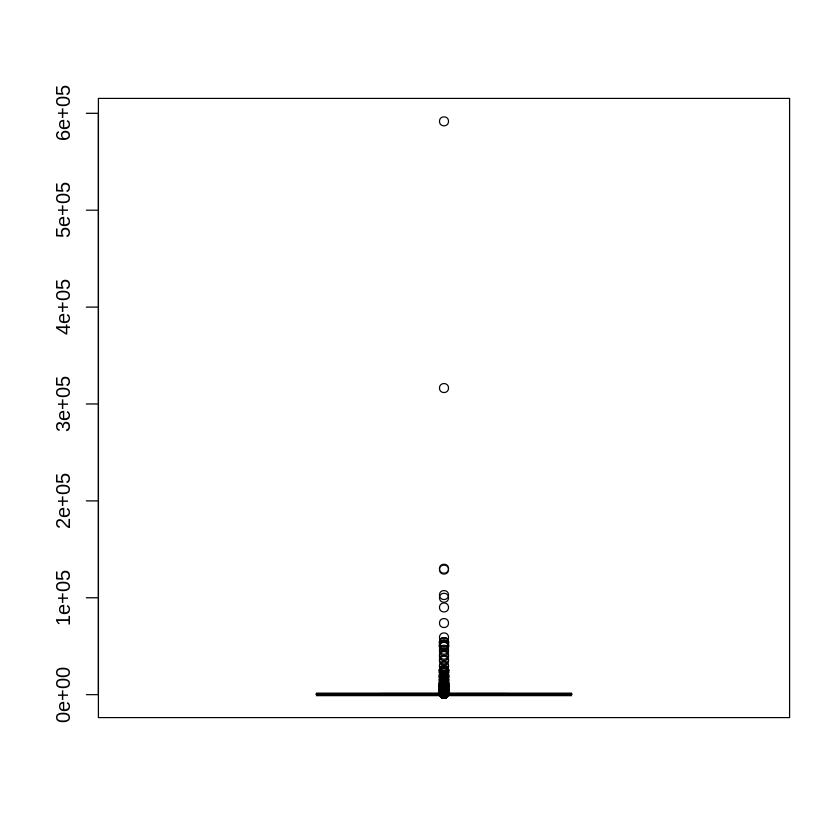

In [31]:
boxplot(df_listing$price2)            

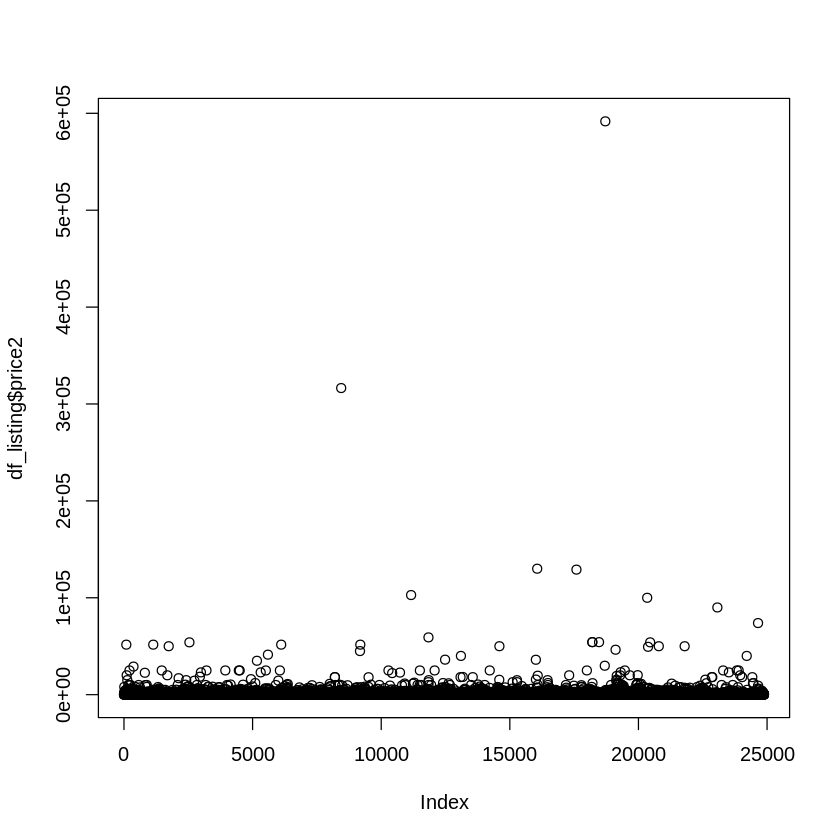

In [32]:
plot(df_listing$price2)     
 

####Gráfico dos preços x acomodação

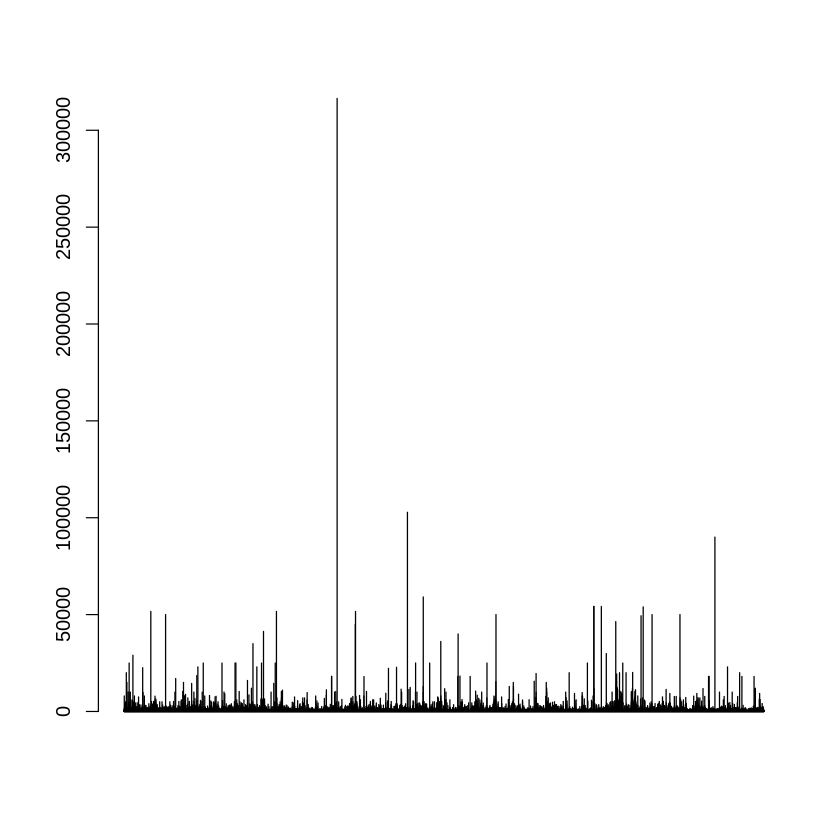

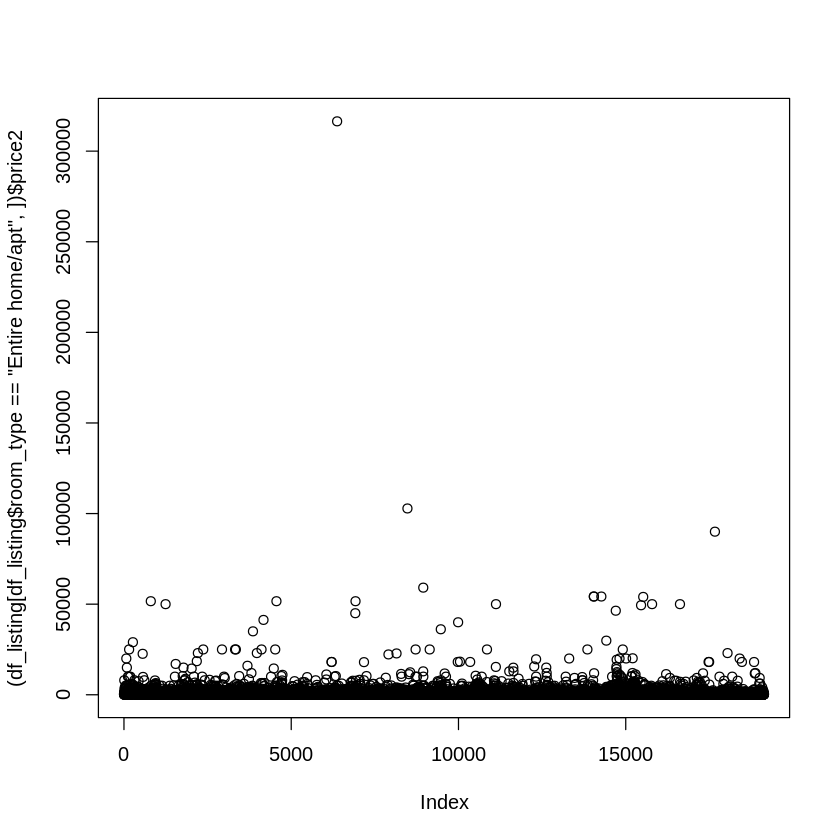

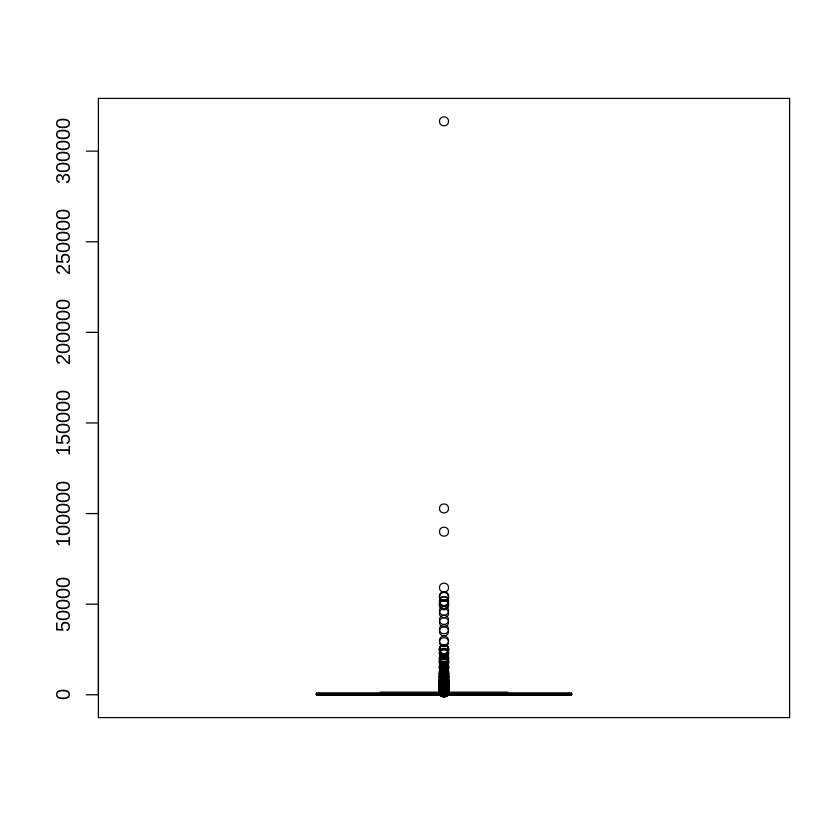

In [42]:
barplot((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)
plot((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)
boxplot((df_listing[df_listing$room_type == 'Entire home/apt', ])$price2)

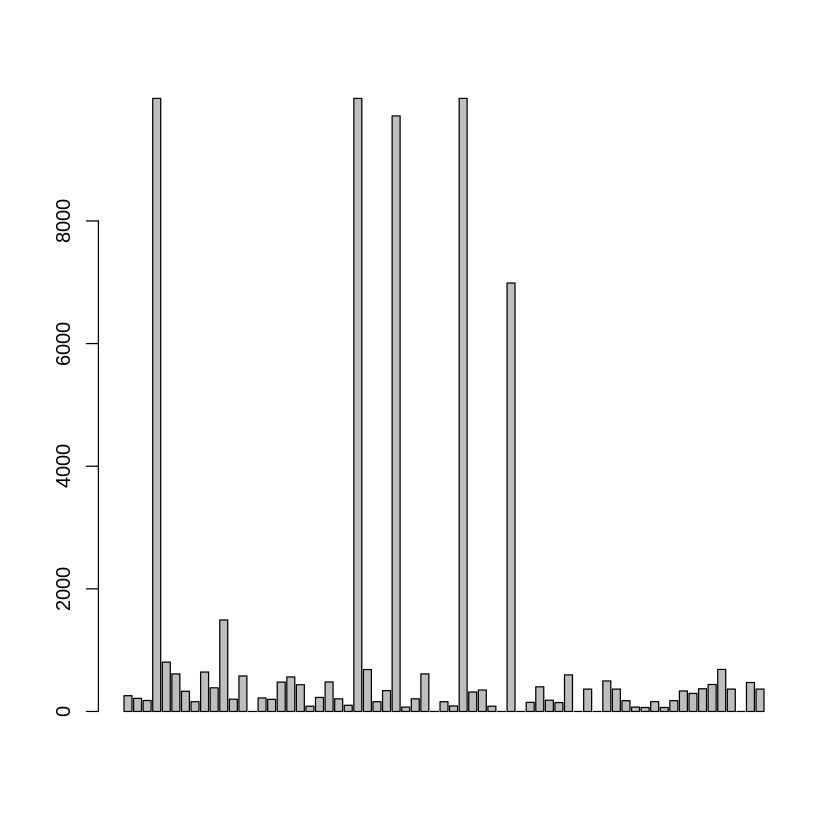

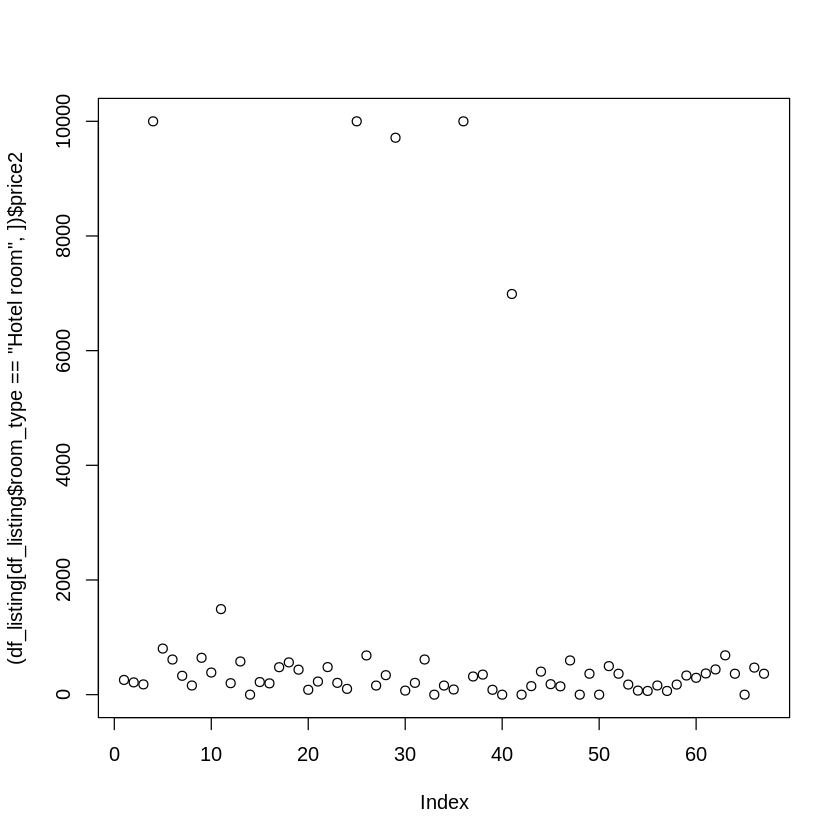

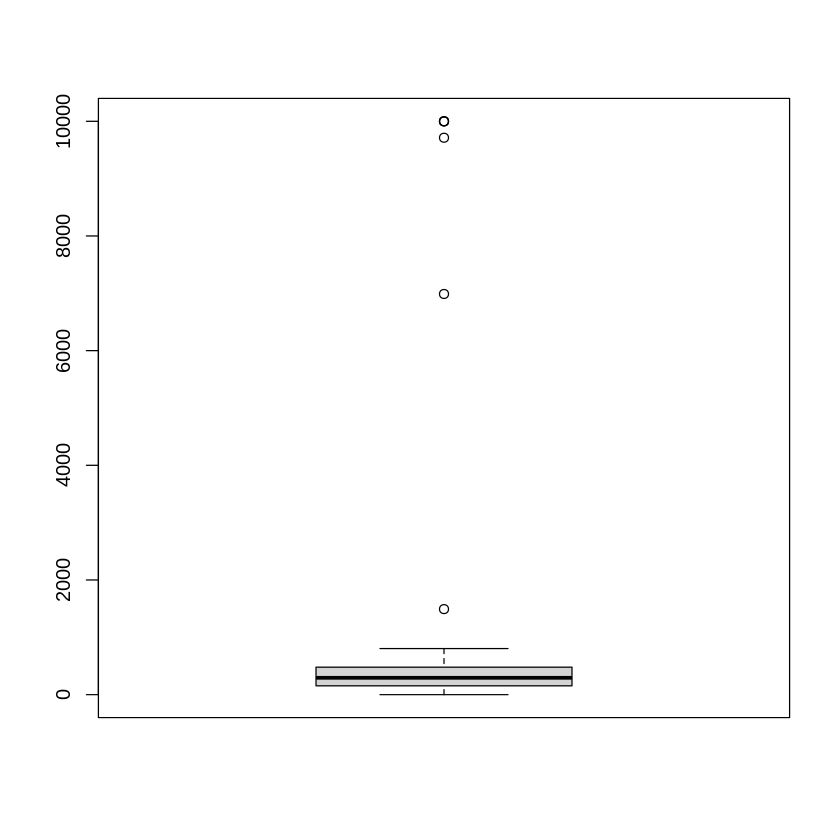

In [41]:
barplot((df_listing[df_listing$room_type == "Hotel room", ])$price2)
plot((df_listing[df_listing$room_type == "Hotel room", ])$price2)
boxplot((df_listing[df_listing$room_type == "Hotel room", ])$price2)

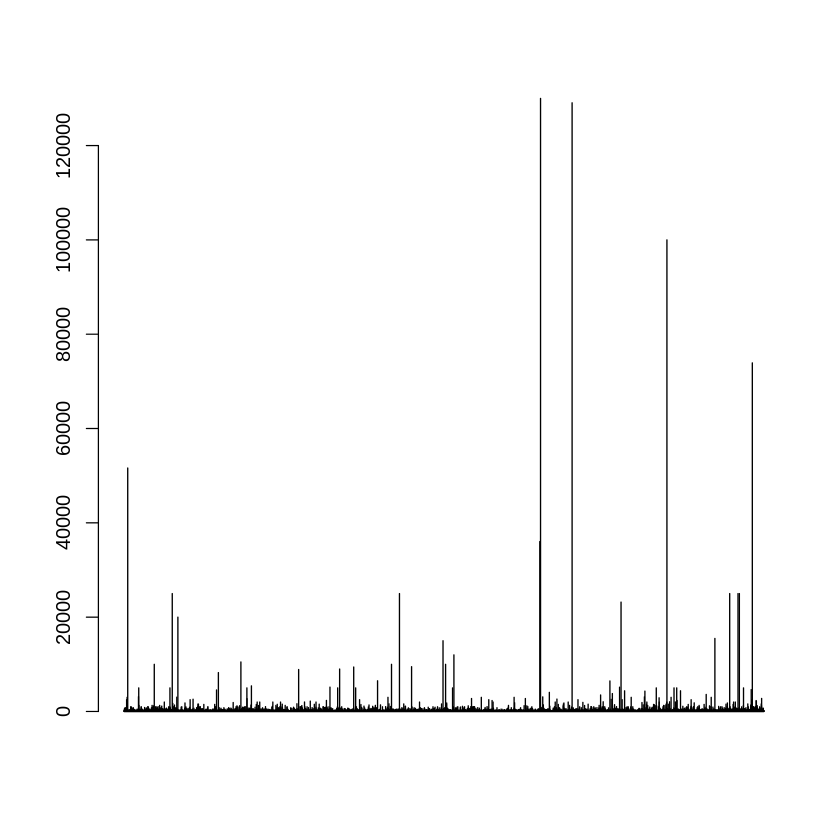

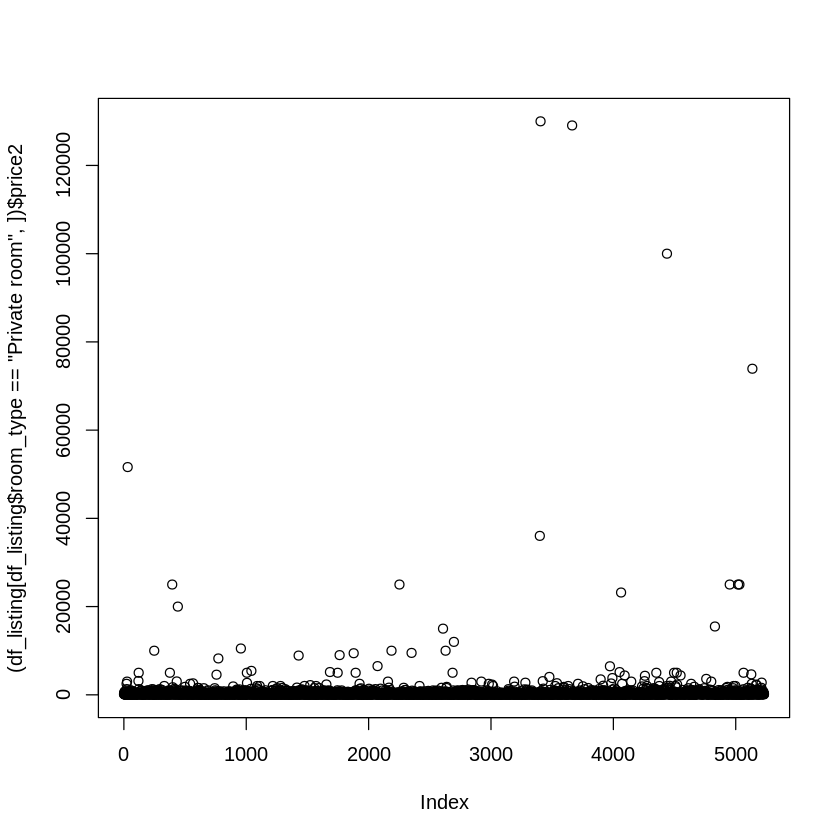

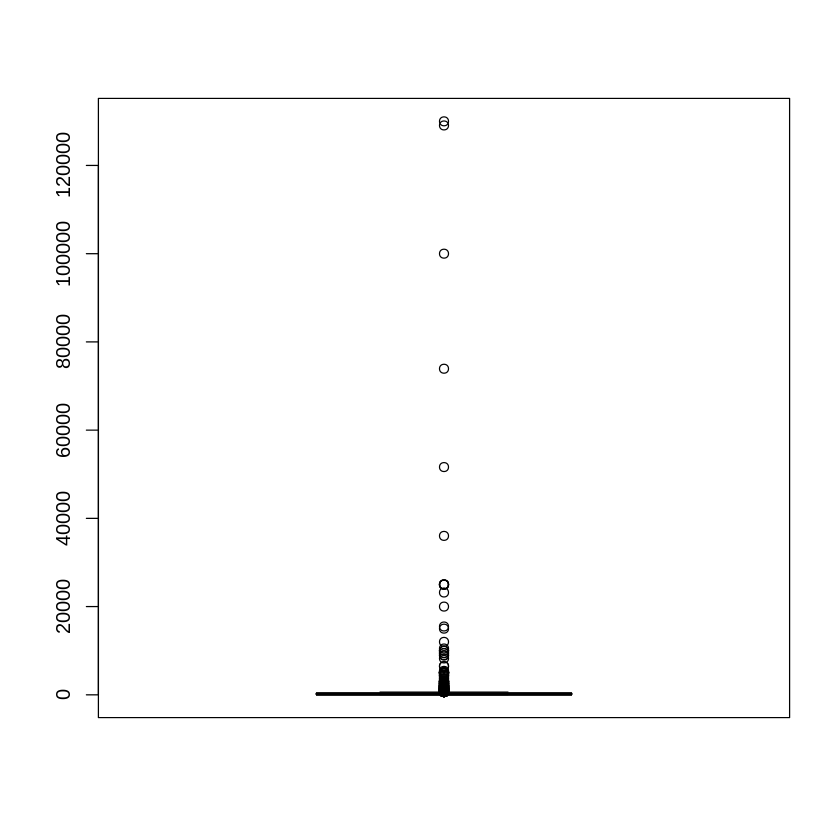

In [40]:
barplot((df_listing[df_listing$room_type == 'Private room', ])$price2)
plot((df_listing[df_listing$room_type == 'Private room', ])$price2)
boxplot((df_listing[df_listing$room_type == 'Private room', ])$price2)

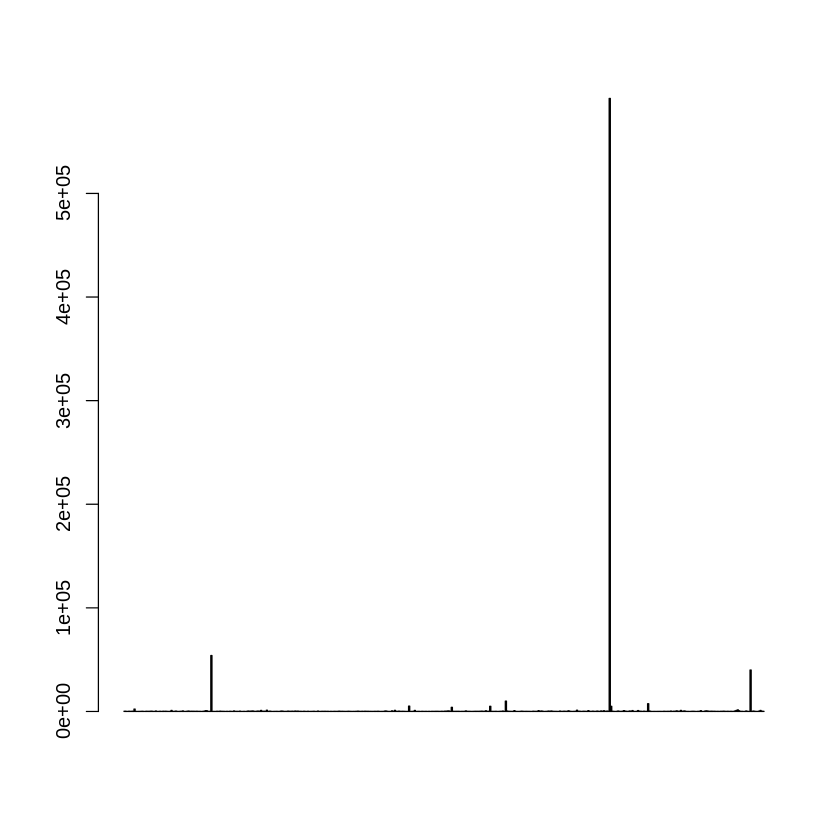

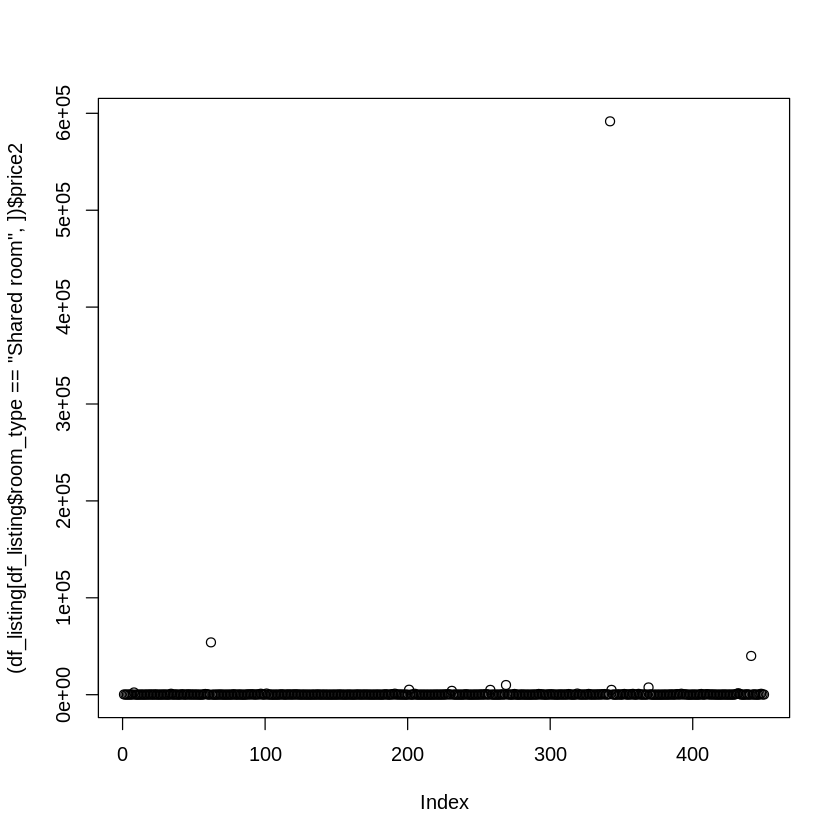

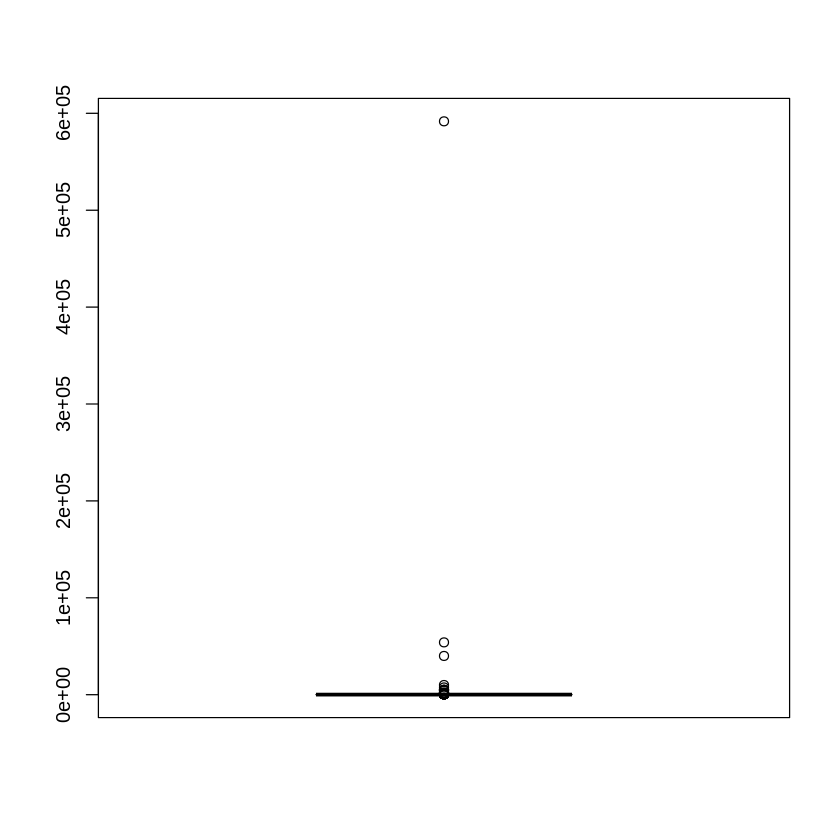

In [39]:
barplot((df_listing[df_listing$room_type == 'Shared room', ])$price2)
plot((df_listing[df_listing$room_type == 'Shared room', ])$price2)
boxplot((df_listing[df_listing$room_type == 'Shared room', ])$price2)

### Gráfico referente as estadias, mínimo e máximo de noites

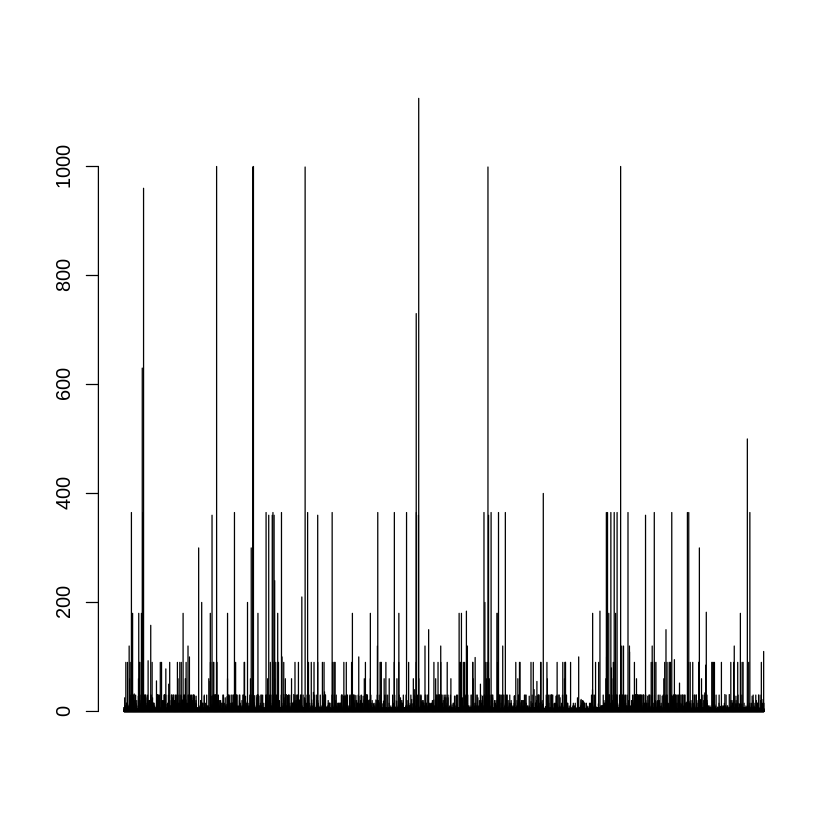

In [38]:
barplot(df_listing$minimum_nights)

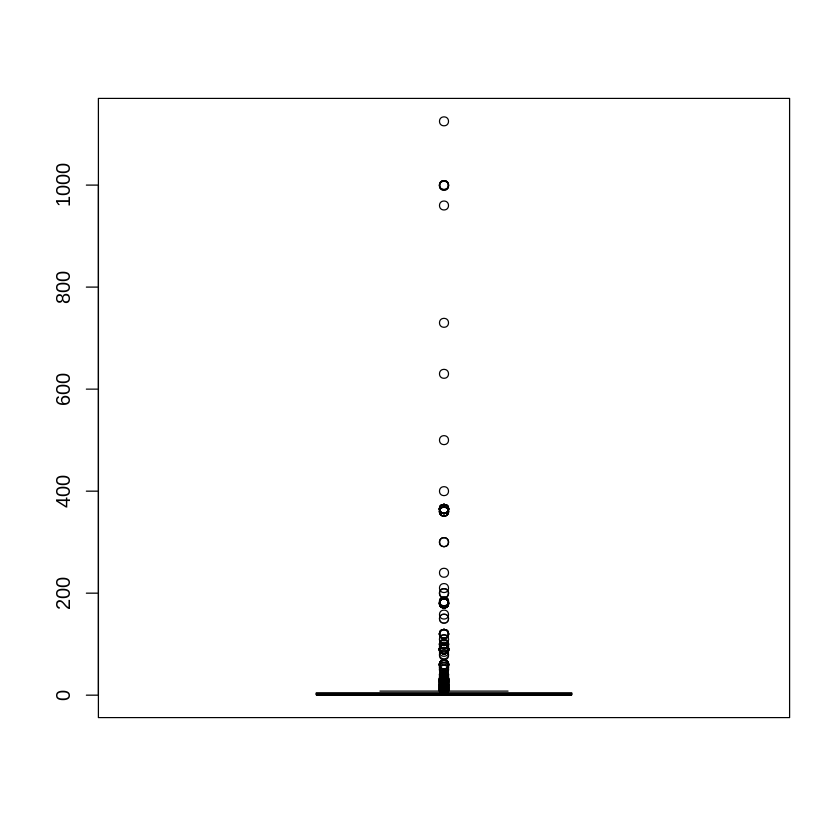

In [37]:
boxplot(df_listing$minimum_nights)

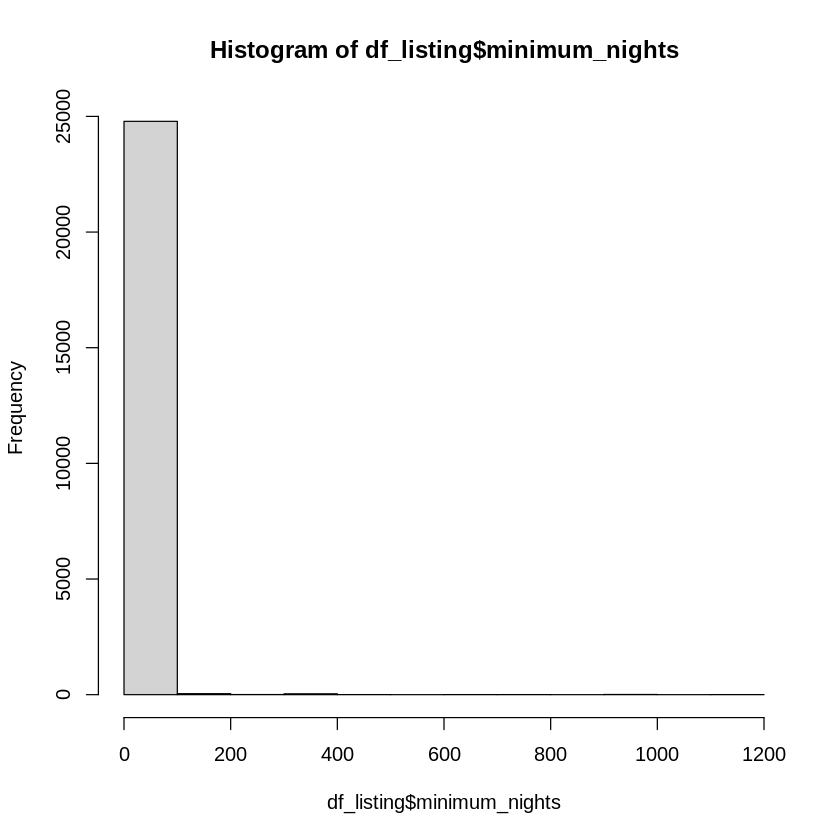

In [36]:
hist(df_listing$minimum_nights)

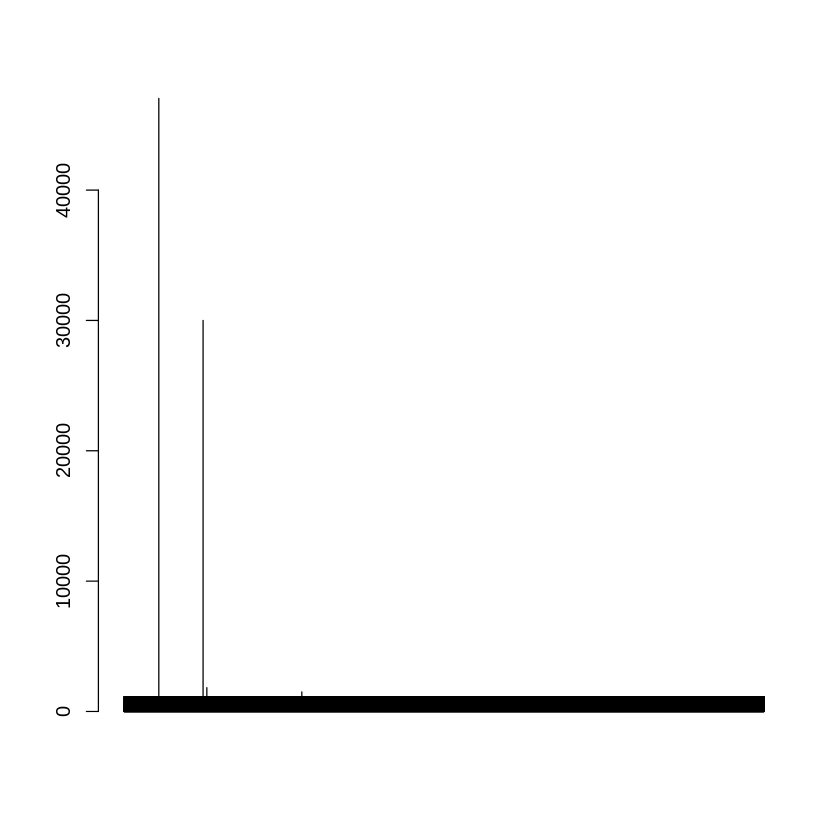

In [35]:
barplot(df_listing$maximum_nights)

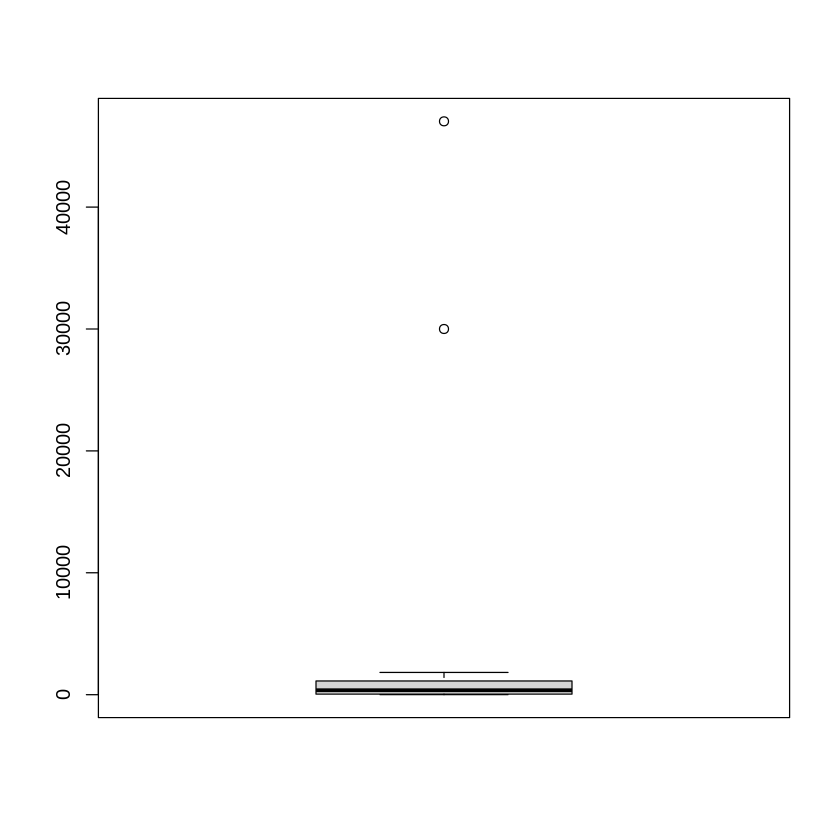

In [34]:
boxplot(df_listing$maximum_nights)

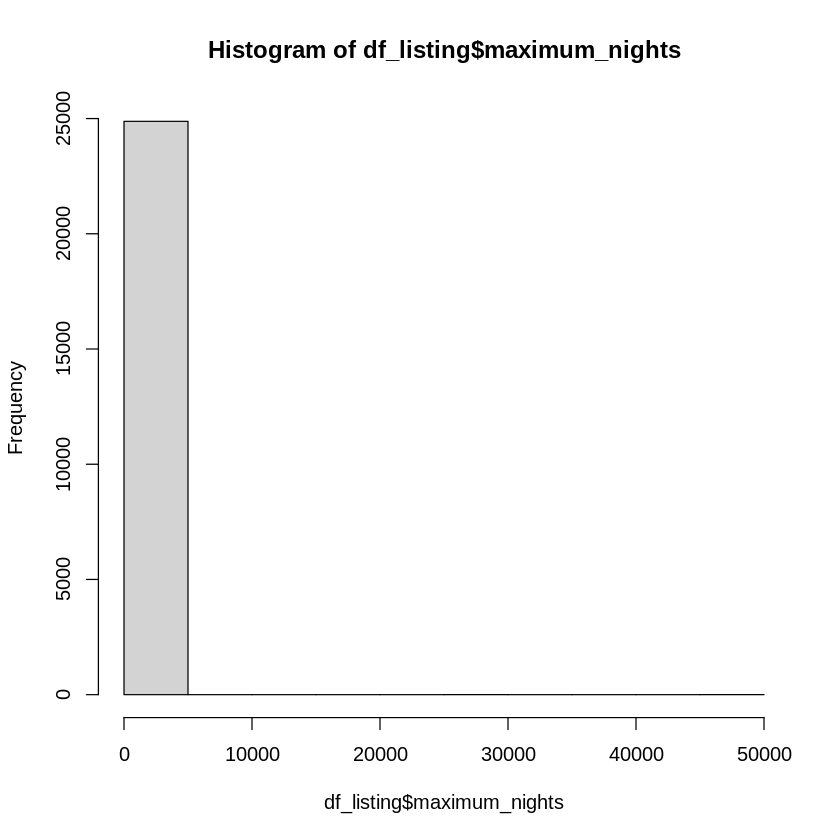

In [33]:
hist(df_listing$maximum_nights)